In [1]:
import os, shutil

#path to uncompressed dataset directory
original_dataset_dir = 'B:/dogs-vs-cats/train/train'

base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

In [2]:
#directories for training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
#directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [4]:
#directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
#directory with validation cat pictures
validation_cats_dir= os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

#directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [6]:
#directory with tets cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

#directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
#copy the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
#copy the first 1000 dog images to train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#copy the next 500 cat images to validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#copy the next 500 cat images to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('total training cat imgages:',len(os.listdir(train_cats_dir)))
print('total training dog imgages:',len(os.listdir(train_dogs_dir)))
print('total validation cat imgages:',len(os.listdir(validation_cats_dir)))
print('total validation dog imgages:',len(os.listdir(validation_dogs_dir)))
print('total test cat imgages:',len(os.listdir(test_cats_dir)))
print('total test dog imgages:',len(os.listdir(test_dogs_dir)))

total training cat imgages: 1000
total training dog imgages: 1000
total validation cat imgages: 500
total validation dog imgages: 500
total test cat imgages: 500
total test dog imgages: 500


In [10]:
#convnet
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 59s 580ms/step - loss: 0.6891 - acc: 0.5340 - val_loss: 0.6690 - val_acc: 0.5820
Epoch 2/30
100/100 [==============================] - 50s 500ms/step - loss: 0.6545 - acc: 0.6170 - val_loss: 0.6357 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 50s 505ms/step - loss: 0.5953 - acc: 0.6730 - val_loss: 0.6185 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 50s 501ms/step - loss: 0.5653 - acc: 0.6950 - val_loss: 0.6004 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 51s 509ms/step - loss: 0.5332 - acc: 0.7345 - val_loss: 0.5822 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 51s 506ms/step - loss: 0.5048 - acc: 0.7595 - val_loss: 0.5690 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 50s 497ms/step - loss: 0.4805 - acc: 0.7710 - val_loss: 0.6229 - val_acc: 0.6680
Epoch 8/30
100/100 [==============================] - 5

In [15]:
model.save('cats_and_dogs_small_1.h5')

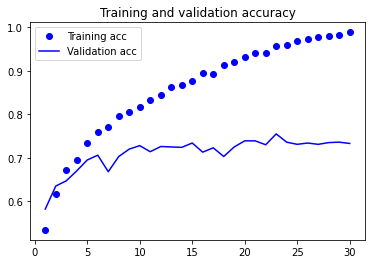

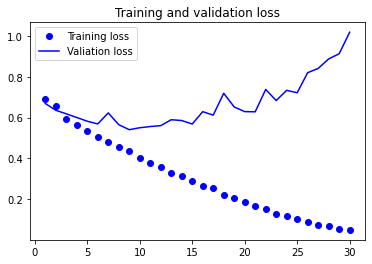

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valiation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

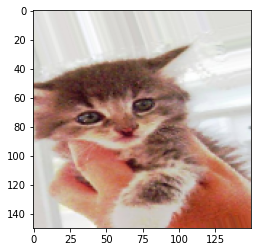

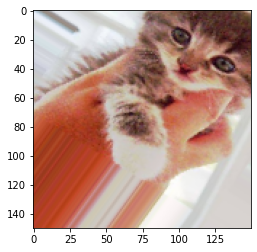

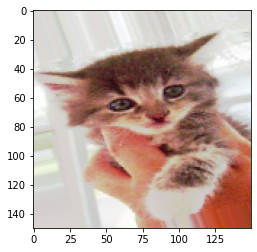

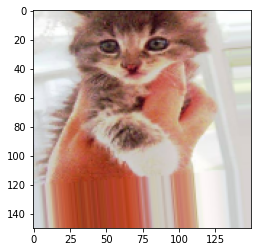

In [18]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [19]:
#new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [26]:
#training the new covnet using data-argumentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 57s 907ms/step - loss: 0.6723 - acc: 0.5930 - val_loss: 0.6939 - val_acc: 0.5200
Epoch 2/100
63/63 [==============================] - 54s 860ms/step - loss: 0.6650 - acc: 0.5865 - val_loss: 0.6435 - val_acc: 0.6030
Epoch 3/100
63/63 [==============================] - 55s 867ms/step - loss: 0.6524 - acc: 0.6125 - val_loss: 0.6333 - val_acc: 0.6240
Epoch 4/100
63/63 [==============================] - 53s 843ms/step - loss: 0.6330 - acc: 0.6310 - val_loss: 0.6379 - val_acc: 0.6200
Epoch 5/100
63/63 [==============================] - 53s 841ms/step - loss: 0.6302 - acc: 0.6415 - val_loss: 0.6073 - val_acc: 0.6700
Epoch 6/100
63/63 [==============================] - 53s 843ms/step - loss: 0.6142 - acc: 0.6650 - val_loss: 0.6093 - val_acc: 0.6550
Epoch 7/100
63/63 [==============================] - 54s 860ms/step - loss: 0.6182 - acc: 0.6605 - val_loss: 0.5

63/63 [==============================] - 49s 771ms/step - loss: 0.4598 - acc: 0.7840 - val_loss: 0.4521 - val_acc: 0.7850
Epoch 62/100
63/63 [==============================] - 49s 774ms/step - loss: 0.4735 - acc: 0.7660 - val_loss: 0.4656 - val_acc: 0.7810
Epoch 63/100
63/63 [==============================] - 48s 763ms/step - loss: 0.4708 - acc: 0.7820 - val_loss: 0.4591 - val_acc: 0.7870
Epoch 64/100
63/63 [==============================] - 49s 777ms/step - loss: 0.4591 - acc: 0.7860 - val_loss: 0.4754 - val_acc: 0.7590
Epoch 65/100
63/63 [==============================] - 49s 781ms/step - loss: 0.4604 - acc: 0.7825 - val_loss: 0.4599 - val_acc: 0.7760
Epoch 66/100
63/63 [==============================] - 49s 772ms/step - loss: 0.4590 - acc: 0.7835 - val_loss: 0.4359 - val_acc: 0.7890
Epoch 67/100
63/63 [==============================] - 49s 776ms/step - loss: 0.4516 - acc: 0.7875 - val_loss: 0.5058 - val_acc: 0.7550
Epoch 68/100
63/63 [==============================] - 49s 771ms/step

In [27]:
model.save('cats_and_dogs_small_2.h5')

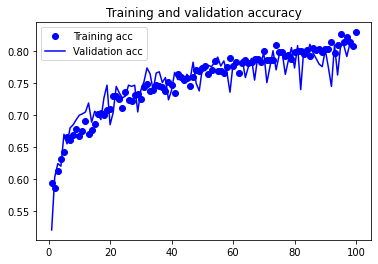

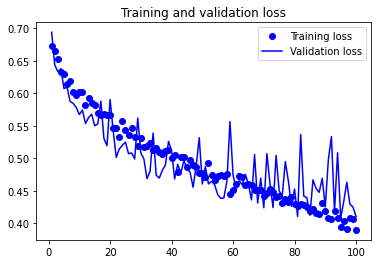

In [28]:
#visualize new model

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
#instantiate the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
#extracting features using the pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator